In [1]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\032')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
GSPC=pd.read_csv('GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09


In [4]:
close=GSPC.Close
high=GSPC.High
low=GSPC.Low

In [5]:
date=close.index.to_series()
ndate=len(date)

In [6]:
periodHigh=pd.Series(np.zeros(ndate-8),\
                  index=date.index[8:])
periodLow=pd.Series(np.zeros(ndate-8),\
                    index=date.index[8:])
RSV=pd.Series(np.zeros(ndate-8),\
               index=date.index[8:])

In [7]:
for j in range(8,ndate):
    period=date[j-8:j+1]
    i=date[j]
    periodHigh[i]=high[period].max()
    periodLow[i]=low[period].min()
    RSV[i]=100*(close[i]-periodLow[i])\
           /(periodHigh[i]-periodLow[i])
    periodHigh.name='periodHigh'
    periodLow.name='periodLow'
    RSV.name='RSV'

In [8]:
periodHigh.head(3)
periodLow.head(3)
RSV.head()

Date
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
2014-01-17    65.628444
2014-01-21    80.068155
Name: RSV, dtype: float64

In [9]:
RSV.describe()

count    326.000000
mean      63.558226
std       31.525472
min        0.000000
25%       37.323359
50%       72.580422
75%       91.854801
max      100.000000
Name: RSV, dtype: float64

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\plotting\_core.py:1694: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


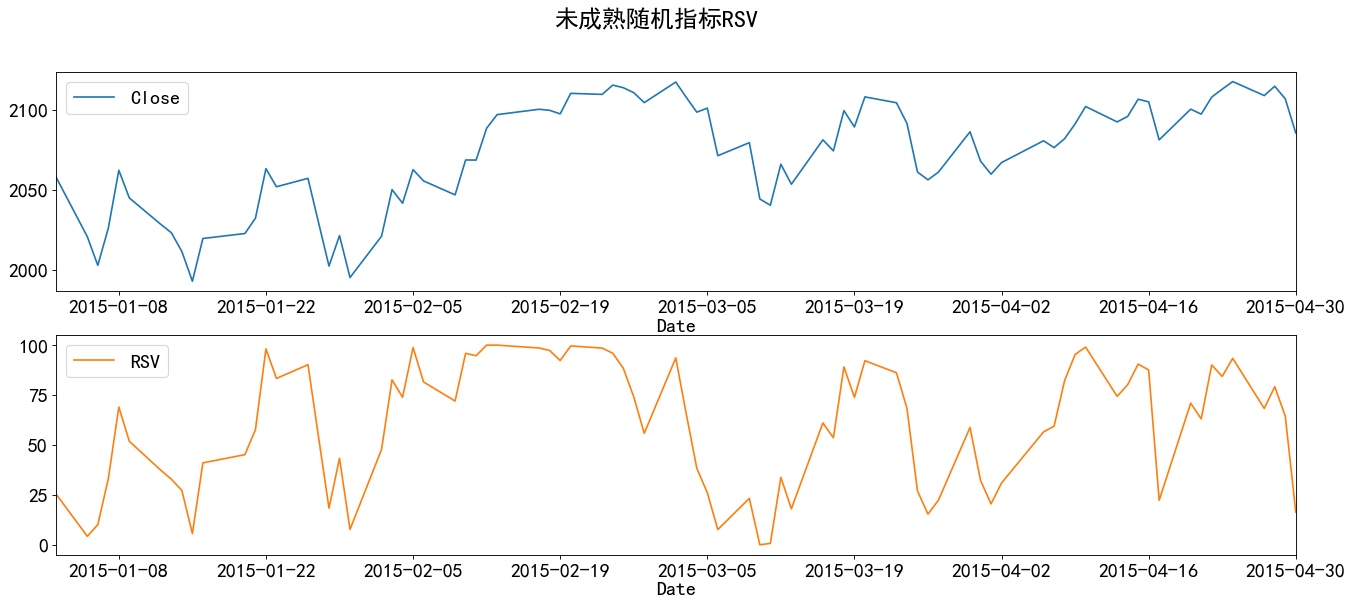

In [17]:
close1=close['2015']
RSV1=RSV['2015']
Cl_RSV=pd.DataFrame([close1,RSV1]).transpose()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=Cl_RSV.plot(subplots=True,
             title='未成熟随机指标RSV',ax=axe1)
plt.show()

In [18]:
GSPC2015=GSPC['2015']

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


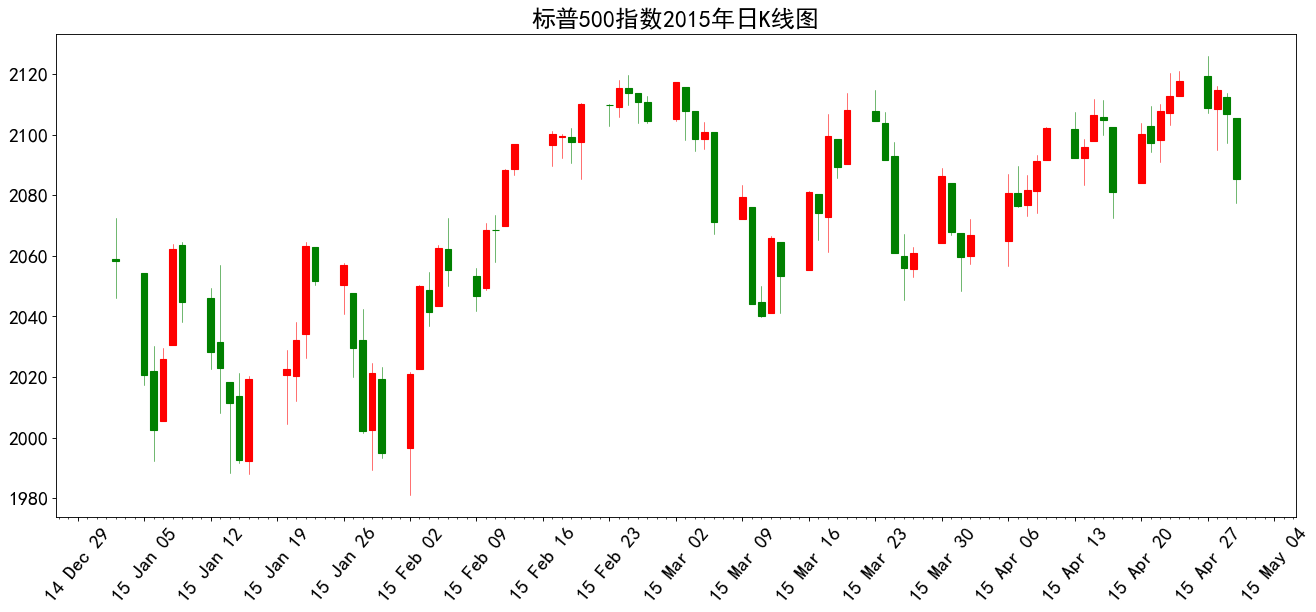

In [19]:
import candle
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
candle.candlePlot(GSPC2015,\
                '标普500指数2015年日K线图')

In [20]:
RSV1=pd.Series([50,50],index=date[6:8]).append(RSV)
RSV1.name='RSV'
RSV1.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
Name: RSV, dtype: float64

In [21]:
KValue=pd.Series(0.0,index=RSV1.index)

In [22]:
KValue[0]=50
for i in range(1,len(RSV1)):
    KValue[i]=2/3*KValue[i-1]+RSV1[i]/3
KValue.name='KValue'
KValue.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
Name: KValue, dtype: float64

In [23]:
DValue=pd.Series(0.0,index=RSV1.index)
DValue[0]=50
for i in range(1,len(RSV1)):
    DValue[i]=2/3*DValue[i-1]+KValue[i]/3

In [24]:
KValue=KValue[1:]
DValue.name='DValue'
DValue=DValue[1:]
DValue.head()

Date
2014-01-13    50.000000
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
Name: DValue, dtype: float64

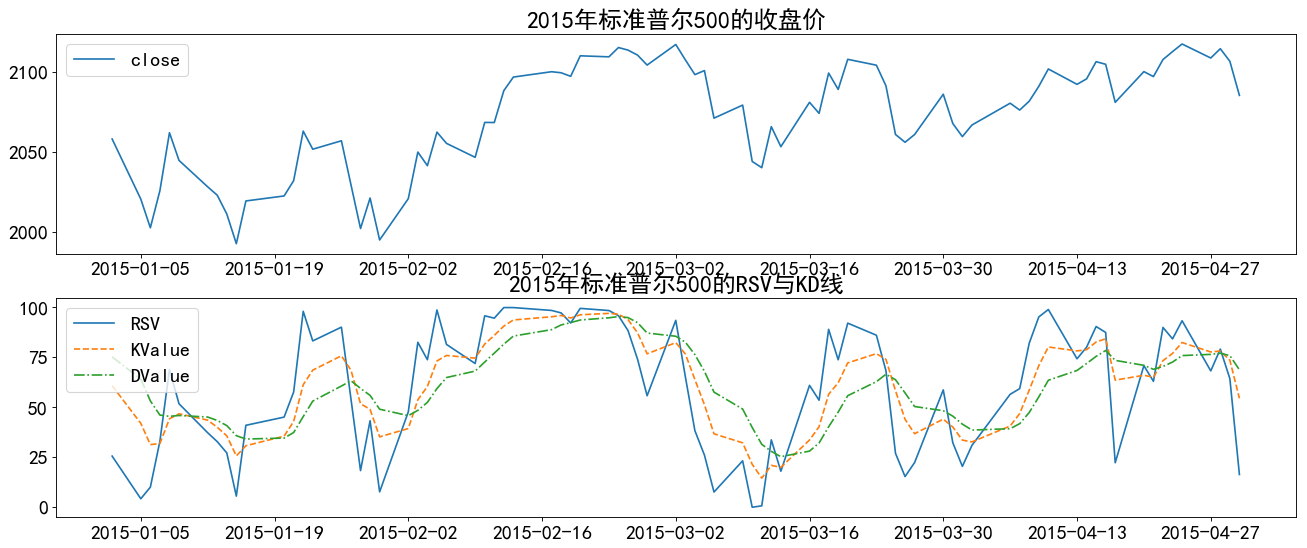

In [28]:
plt.figure(figsize=(20,8),dpi=80)
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'],label='close')
plt.legend()
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KD线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed')
plt.plot(DValue['2015'],linestyle='-.')
plt.legend(loc='upper left')
plt.show()

In [30]:
JValue=3*KValue-2*DValue
JValue.name='JValue'
JValue.head()

Date
2014-01-13    50.000000
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
Name: JValue, dtype: float64

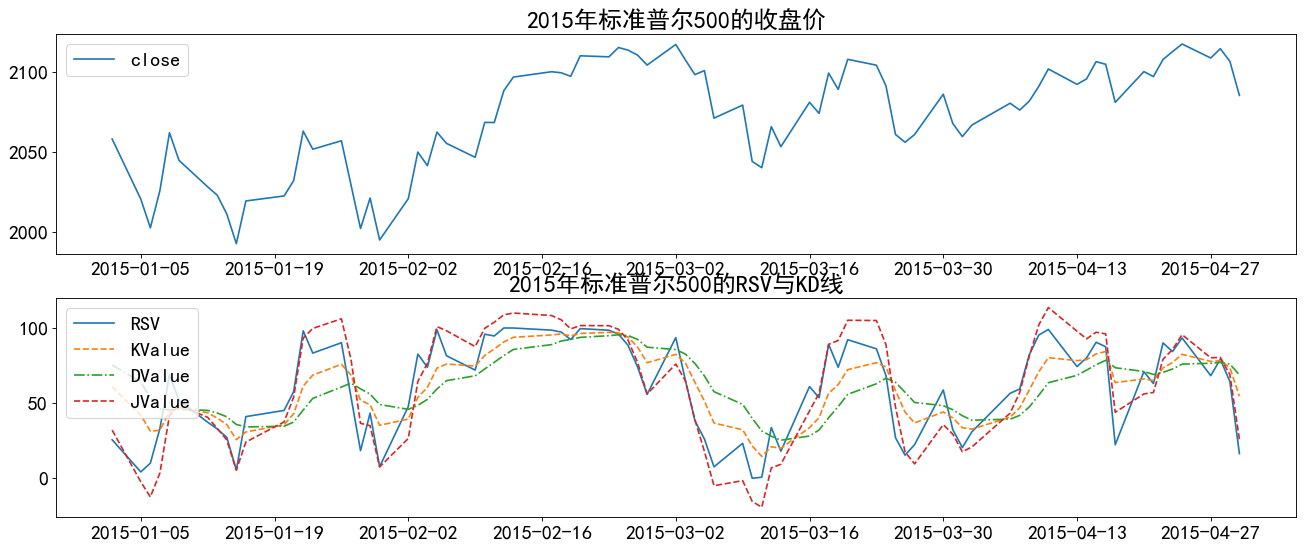

In [34]:
plt.figure(figsize=(20,8),dpi=80)
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'],label='close')
plt.legend()
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KD线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed')
plt.plot(DValue['2015'],linestyle='-.')
plt.plot(JValue['2015'],linestyle='--')
plt.legend(loc='upper left')
plt.show()

In [35]:
KSignal=KValue.apply(lambda x:\
                    -1 if x>85 else 1 if x<20 else 0)

In [36]:
DSignal=DValue.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)

In [37]:
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'

In [38]:
KDSignal[KDSignal>=1]==1
KDSignal[KDSignal<=-1]==-1
KDSignal.head(n=3)

Date
2014-01-13    0
2014-01-14    0
2014-01-15    0
Name: KDSignal, dtype: int64

In [39]:
KDSignal[KDSignal==1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-08-06    1
Name: KDSignal, dtype: int64

In [40]:
def trade(signal,price):
    ret=((price-price.shift(1))/price.shift\
         (1))[1:]
    ret.name='ret'
    signal=signal.shift(1)[1:]
    tradeRet=ret*signal+0
    tradeRet.name='tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

In [41]:
KDtrade=trade(KDSignal,close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

,Ret,KDtradeRet
Date,,
2014-01-14,0.010818,0.0
2014-01-15,0.005166,0.0
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0


In [42]:
import ffn
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

In [43]:
backtest(KDtrade.Ret,KDtrade.KDtradeRet)

,KDtradeRet,Ret
win rate,0.490566,0.549080
annualized return,0.017613,0.108128
sharpe ratio,0.017315,0.060163
maximum drawdown,-0.097439,-0.074015


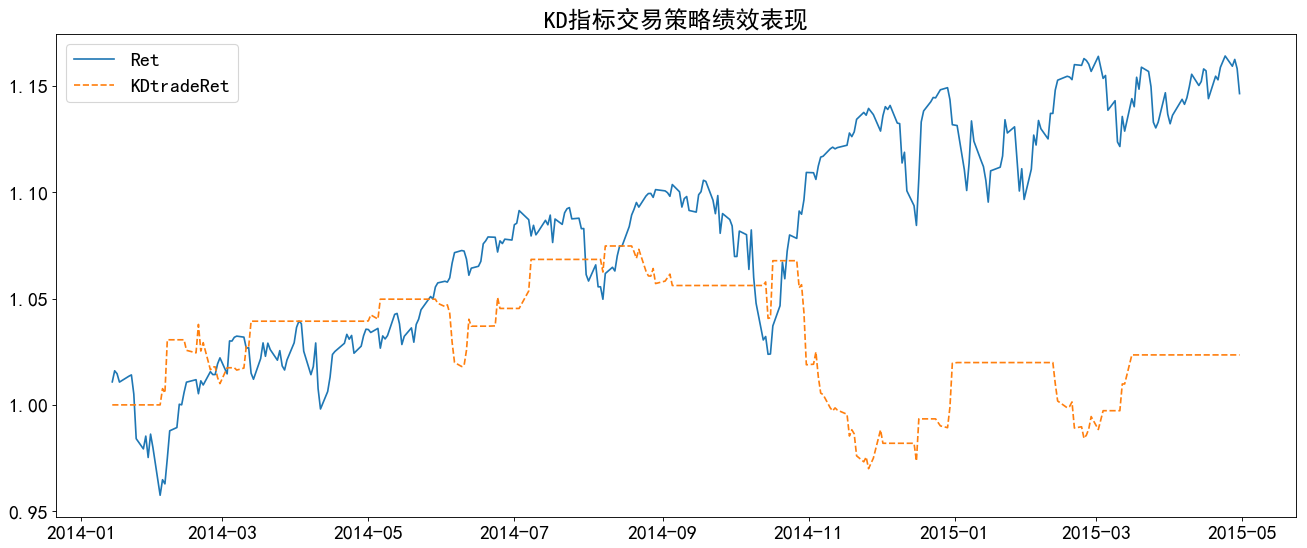

In [44]:
cumRets1=(1+KDtrade).cumprod()
plt.figure(figsize=(20,8),dpi=80)
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
          label='KDtradeRet')
plt.title('KD指标交易策略绩效表现')
plt.legend()
plt.show()

In [45]:
backtest(KDtrade.Ret[:'2014-10-10'],\
          KDtrade.KDtradeRet[:'2014-10-10'])

,KDtradeRet,Ret
win rate,0.500000,0.569149
annualized return,0.073788,0.062719
sharpe ratio,0.074971,0.039369
maximum drawdown,-0.030184,-0.057613


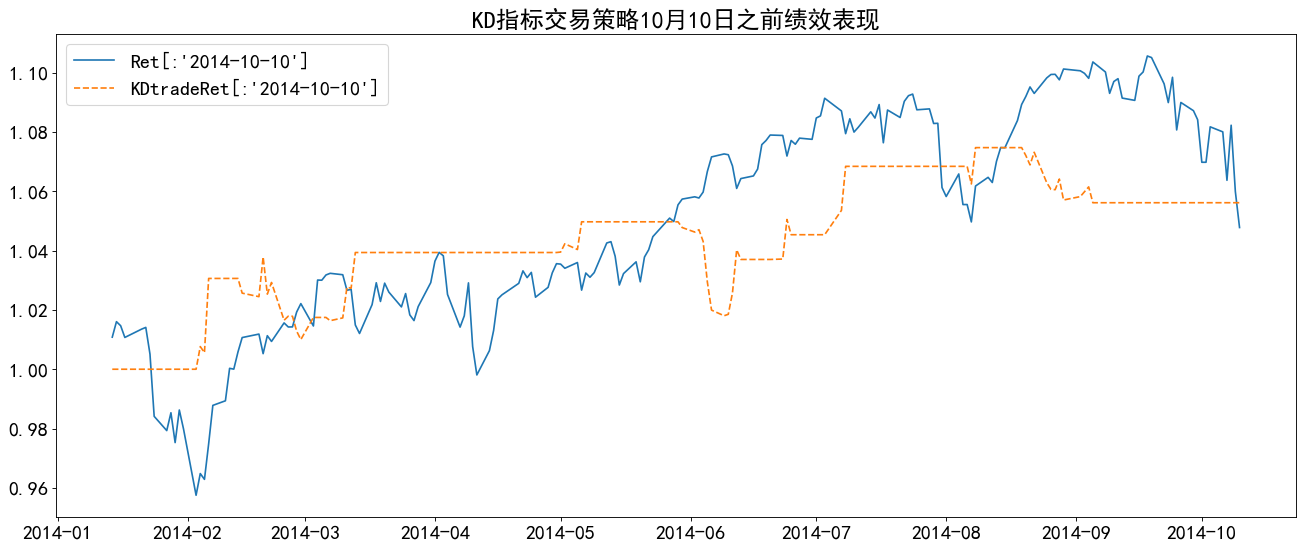

In [46]:
cumRets2=(1+KDtrade[:'2014-10-10']).cumprod()
plt.figure(figsize=(20,8),dpi=80)
plt.plot(cumRets2.Ret,\
          label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet[:'2014-10-10']''')
plt.title('KD指标交易策略10月10日之前绩效表现')
plt.legend(loc='upper left')
plt.show()

In [47]:
JSignal=JValue.apply(lambda x:\
         -1 if x>100 else 1 if x<0 else 0)

In [48]:
KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x:\
          1 if x>=2 else -1 if x<=-2 else 0)

In [49]:
KDJtrade=trade(KDJSignal,close)
KDJtrade.rename(columns={'ret':'Ret',\
             'tradeRet':'KDJtradeRet'},\
             inplace=True)

In [50]:
backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)

,KDJtradeRet,Ret
win rate,0.506024,0.549080
annualized return,0.005666,0.108128
sharpe ratio,0.009630,0.060163
maximum drawdown,-0.052597,-0.074015


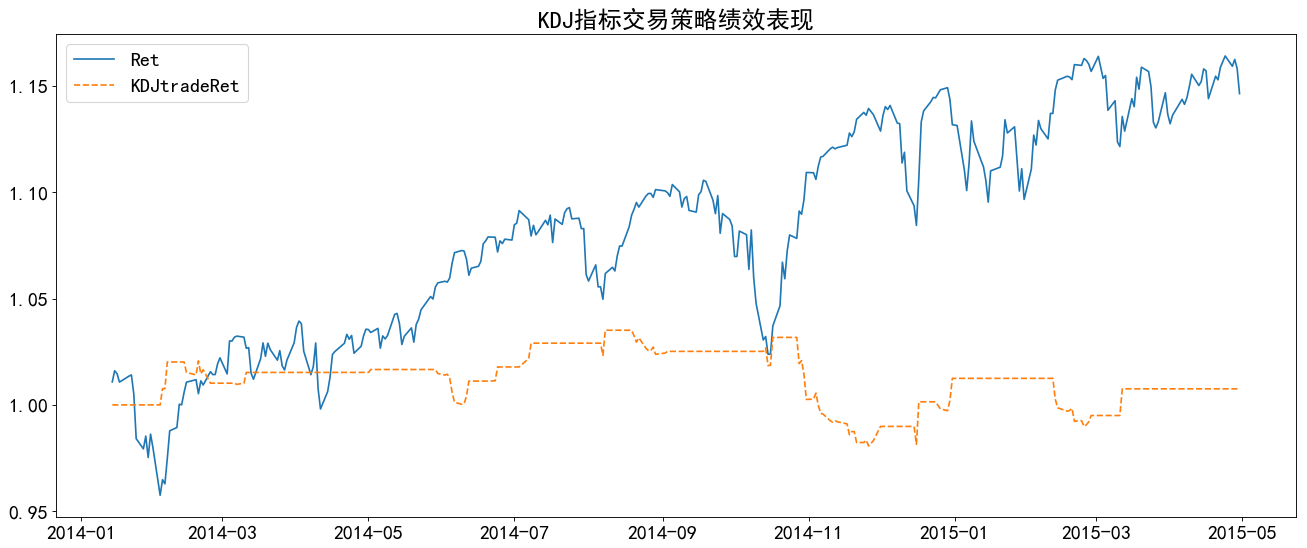

In [51]:
KDJCumRet=(1+KDJtrade).cumprod()
plt.figure(figsize=(20,8),dpi=80)
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
          label='KDJtradeRet')
plt.title('KDJ指标交易策略绩效表现')
plt.legend(loc='upper left')
plt.show()

In [52]:
backtest(KDJtrade.Ret[:'2014-10-10'],\
             KDJtrade.KDJtradeRet[:'2014-10-10'])

,KDJtradeRet,Ret
win rate,0.538462,0.569149
annualized return,0.032922,0.062719
sharpe ratio,0.063196,0.039369
maximum drawdown,-0.020006,-0.057613


In [53]:
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
                     index=Line.index[1:]))

In [54]:
KDupbreak=upbreak(KValue,DValue)*1
KDupbreak[KDupbreak==1].head()

Date
2014-02-06    1
2014-03-04    1
2014-03-20    1
2014-03-31    1
2014-04-16    1
dtype: int32

In [55]:
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
           index=Line.index[1:]))

In [56]:
KDdownbreak=downbreak(KValue,DValue)*1
KDdownbreak[KDdownbreak==1].head()

Date
2014-01-23    1
2014-02-21    1
2014-03-11    1
2014-03-24    1
2014-04-07    1
dtype: int32

In [57]:
close=close['2014-01-14':]
difclose=close.diff()

In [58]:
prctrend=2*(difclose[1:]>=0)-1
prctrend.head()

Date
2014-01-15    1
2014-01-16   -1
2014-01-17   -1
2014-01-21    1
2014-01-22    1
Name: Close, dtype: int32

In [59]:
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)

Date
2014-01-15    False
2014-01-16    False
2014-01-17    False
dtype: bool

In [60]:
KDdownSig=pd.Series(np.all([KDdownbreak[1:]==1,prctrend==-1],\
                    axis=0),\
                  index=prctrend.index)

In [61]:
breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()

Date
2014-01-15    0
2014-01-16    0
2014-01-17    0
2014-01-21    0
2014-01-22    0
Name: breakSig, dtype: int32

In [62]:
KDbreak=trade(breakSig,close)
KDbreak.rename(columns={'ret':'Ret',\
              'tradeRet':'KDbreakRet'},\
              inplace=True)
KDbreak.head()

,Ret,KDbreakRet
Date,,
2014-01-16,-0.001347,0.0
2014-01-17,-0.003895,0.0
2014-01-21,0.002774,0.0
2014-01-22,0.000575,0.0
2014-01-23,-0.008890,0.0


In [63]:
backtest(KDbreak.Ret,KDbreak.KDbreakRet)

,KDbreakRet,Ret
win rate,0.433962,0.546296
annualized return,-0.024988,0.095568
sharpe ratio,-0.034377,0.053920
maximum drawdown,-0.086469,-0.074015


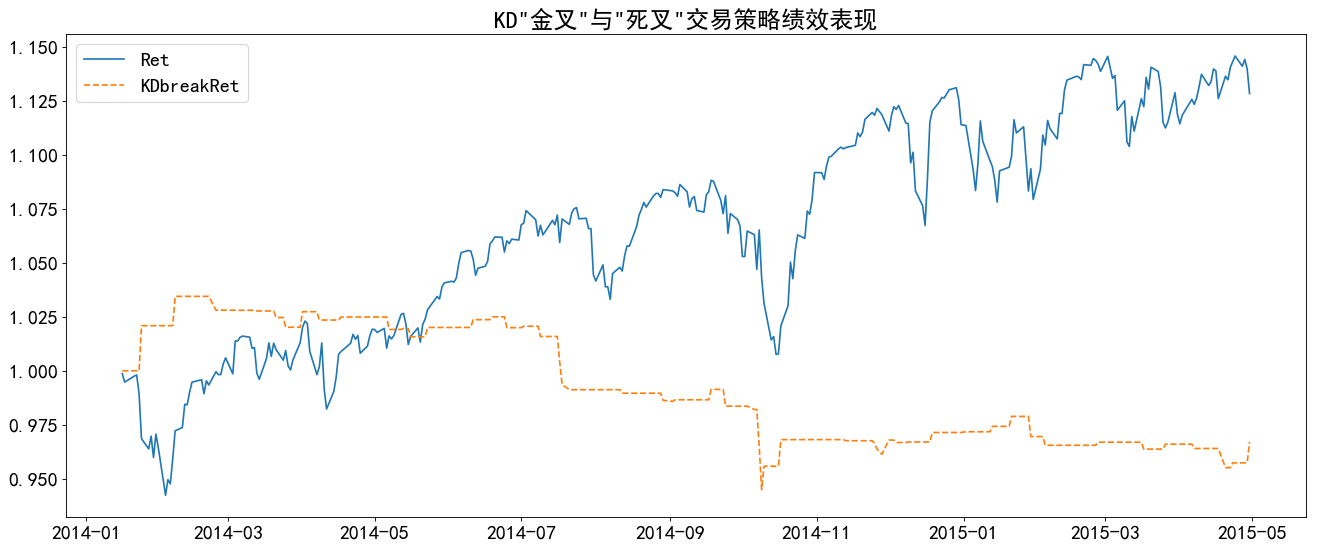

In [64]:
KDbreakRet=(1+KDbreak).cumprod()
plt.figure(figsize=(20,8),dpi=80)
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
          label='KDbreakRet')
plt.title('KD"金叉"与"死叉"交易策略绩效表现')
plt.legend(loc='upper left')
plt.show()

In [67]:
import pandas as pd
import numpy as np
import movingAverage as ma
import matplotlib.pyplot as plt
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

# 2.获取标普500指数(股票代码:"GSPC")2013-2014年度日交易数据，并制定以下KDJ线交易策略
# (1)K大于80，超买，释放卖出信号；K小于20，超卖，释放买入信号                         (2)D大于80，超买，释放卖出信号；D小于20，超卖，释放买入信号 (3)J大于100，超买，释放卖出信号；J小于0，超卖，释放买入信号

In [68]:
GSPC = pd.read_csv('Data/Part5/006/problem32-2.csv',
                index_col='date')
                
GSPC.index.name='Date'

GSPC.index = pd.to_datetime(GSPC.index,format='%Y-%m-%d')

minValue = GSPC.Low.rolling(9).min()

maxValue = GSPC.High.rolling(9).max()

In [69]:
RSV = (GSPC.Close - minValue)/(maxValue - minValue) * 100
RSV = RSV.dropna()

In [70]:
K = ma.ewmaCal(RSV,2,1/3)[1:]
D = ma.ewmaCal(K,2,1/3)[1:]
J = 3*K - 2*D
J = J.dropna()

In [71]:
KDJ = pd.concat([K,D,J],1).dropna()
KDJ.columns = ['K','D','J']

In [72]:
signal1 = [1 if KDJ.K[i] < 20 else -1 if KDJ.K[i] > 80 else 0 for i in range(len(KDJ))]
signal2 = [1 if KDJ.D[i] < 20 else -1 if KDJ.D[i] > 80 else 0 for i in range(len(KDJ))]
signal3 = [1 if KDJ.J[i] < 0 else -1 if KDJ.J[i] > 100 else 0 for i in range(len(KDJ))]

In [73]:
signal = np.array(signal1) + np.array(signal2) + np.array(signal3)         
signal = pd.Series(signal, index = KDJ.index)

In [74]:
ret = (GSPC.Close - GSPC.Close.shift(1))/GSPC.Close.shift(1)
KDJRet = ret * signal.shift(1)
KDJRet = KDJRet.dropna()
sum(KDJRet>0)/sum(KDJRet!=0)

0.45977011494252873

# 3.KDJ指标由威廉指标发展而来，①现利用上题原数据计算14日威廉指标

In [75]:
minValue = GSPC.Low.rolling(14).min()
maxValue = GSPC.High.rolling(14).max()

WR = (maxValue - GSPC.Close) / (maxValue - minValue) * 100

WR = WR.dropna()

# ②规定威廉指标高于80，超卖，释放买入信号；该指标低于20，超买，释放卖出信号；使用上题原数据，制定上述策略，捕捉市场买卖点

In [76]:
signal = [1 if WR[i]>80 else -1 if WR[i]<20 else 0 for i in range(len(WR))]

signal = pd.Series(signal,index = WR.index)

WRRet = ret * signal.shift(1)

WRRet = WRRet.dropna()

sum(WRRet>0)/sum(signal!=0)

0.48148148148148145